## Regression for Kaggle House Price
* 성능 지표 : RMSE(Residual Mean Sum of Square)

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

### Library Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline

### Datasets Load 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/datasets/house-prices-advanced-regression-techniques 

/content/drive/MyDrive/Colab Notebooks/datasets/house-prices-advanced-regression-techniques


In [4]:
def get_datasets():
  """
  Getting the datasets 
  """
  house_df_org = pd.read_csv("house_price.csv")
  house_df = house_df_org.copy()
  return house_df_org, house_df

In [5]:
house_df_org, house_df = get_datasets()

In [6]:
display(house_df.shape, house_df_org.shape)

(1460, 81)

(1460, 81)

In [7]:
display(house_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

**Feature Description**

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

GrLivArea: Above grade (ground) living area square feet(전용면적)
    
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

LotArea: Lot size in square feet
    
GarageArea: Size of garage in square feet
    
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

Neighborhood: Physical locations within Ames city limits(거주지역)

   Blmngtn  Bloomington Heights
   Blueste  Bluestem
   BrDale   Briardale
   .....

RoofMatl: Roof material(지붕재질)
	ClyTile	Clay or Tile
	CompShg	Standard (Composite) Shingle
	Membran	Membrane
	Metal	Metal
	.....

RoofStyle: Type of roof
	Flat	Flat
	Gable	Gable
	Gambrel	Gabrel (Barn)
	.....

### Data Preprocessing

In [8]:
display(house_df.head(n=3))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


#### Check out data type and null count

In [9]:
def show_dataset_info(df):
  """
  널컬럼 정보및 널컬럼 갯수   
  """
  display("데이터셋의 Shape : ", df.shape)

  # 데이터타입별로 건수 
  display("\n 전체 피처들의 Type : \n", df.dtypes.value_counts)

  print("\n")

  # 널인것은 0, 널이 아닌것은 1
  isnull_series = df.isnull().sum()
  display(isnull_series, type(isnull_series))
  print("\n")
  # 널을 가지는 컬럼
  display("\n Null컬럼과 그 건수 : \n",isnull_series[isnull_series > 0 ].sort_values(ascending=False))
  display(df.describe())

In [10]:
show_dataset_info(house_df)

'데이터셋의 Shape : '

(1460, 81)

'\n 전체 피처들의 Type : \n'

<bound method IndexOpsMixin.value_counts of Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object>

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

pandas.core.series.Series

'\n Null컬럼과 그 건수 : \n'

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Check out the distribution of Target feature of named SalePrice
* Comparing AS_IS to ToBe - logarithm transformation

In [11]:
def show_salePrice_distplot(df, logT=True):
  """
  SalesPrice의 로그변환전과 변환후의 분포 및 밀도 
  """
  titleStr = None
  salesPrice = None
  if logT:  # 로그변환
    salesPrice = np.log1p(df['SalePrice'])
    titleStr = "SalePrce Histo after Log Transform"    
  else:
    titleStr = "SalePrice Histo befor Log transform"
    salesPrice  = df['SalePrice']

  plt.title("{0}".format(titleStr))
  sns.distplot(salesPrice)
  plt.show()

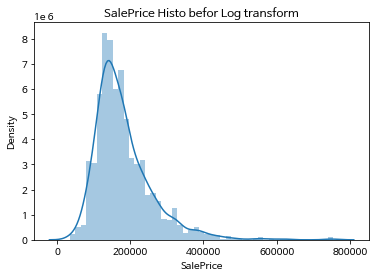

In [12]:
# 타겟값이 편향된 데이터분포도를 보임.
# 오른쪽으로 long tail형태
show_salePrice_distplot(house_df, False)

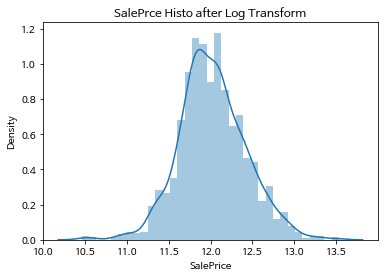

In [13]:
# 로그변환을 통해 정규화 진행후 확인
# 0값을 로그변환하면 마이너스 무한대가 나오므로 +1을 함
show_salePrice_distplot(house_df, True)

#### Feature Engineering
* 타겟값인 Price를 로그변환하여 정규 분포 형태로 변환
* 피처들 중 숫자형 컬럼의 Null값 데이터 처리
* 데이터타입이 문자형인 피처를 원핫인코딩 수행

In [14]:
def feature_engineering(df, dropCols: list, ohEncode=False):
  """
  1.타겟값은 Price를 로그변환하여 정규분포형태로 변환
  2.피처들 중 숫자형 컬럼의 널값에 대한  median값 처리 
  3.불필요한 피처 삭제 : ['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu']
  4.문자열값이 피처들을 원핫인코딩으로 변환후 해당 데이터셋 반환(ohEncode값이 True이면 수행)
  """
  result_df = pd.DataFrame()  
  original_SalePrice = df['SalePrice']
  df['SalePrice'] = np.log1p(df['SalePrice'])

  # 널이 많은 불필요한 컬럼 삭제
  # 삭제시 에러가 나더라도 예외처리함.
  df.drop(dropCols, axis=1, inplace=True, errors='ignore')

  # Drop하지 않은 숫자형 컬럼중 널값을 median으로 처리(강의에서는 mean값으로 대치)
  df.fillna(df.median(), inplace=True)

  # 널값이 피처명과 타입 추출
  isnull_column = df.isnull().sum()
  null_column_count = isnull_column[isnull_column > 0]
  print("## Null 피처의 Type : \n", df.dtypes[null_column_count.index])

  result_df = df.copy()
  # 문자열값은 모두 카테고리값. 판다스의 get_dummies( )를 이용하여 원-핫 인코딩 수행
  if ohEncode:
    display("pd.get_dummies() 전 Shape ", df.shape)
    house_df_ohe = pd.get_dummies(df)
    print("\n")
    display("pd.get_dummies() 후 Shape", house_df_ohe.shape)

    # 널값이 포함되어있는 컬럼의 값도 문자열 데이터타입에 대해서 
    # 원핫인코딩 수행
    isnull_column = house_df_ohe.isnull().sum()
    null_column_count = isnull_column[isnull_column > 0]
    print("## Null 피처의 Type : \n", house_df_ohe.dtypes[null_column_count.index])
    result_df = house_df_ohe.copy()

  return original_SalePrice, result_df

In [15]:
# 원핫인코딩하지 않음
dropCols = ['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu']
original_SalePrice, house_df = feature_engineering(house_df, dropCols)
display(house_df.head(n=3))

## Null 피처의 Type : 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171


* **문자열 값은 모두 카테고리 값, 판다스의 get_dummies()를 이용하여 원핫인코딩 (널값과 원-핫인코딩 같이 수행)**

In [16]:
# 문자열값은 모두 카테고리값. 판다스의 get_dummies( )를 이용하여 원-핫 인코딩 수행
# 피처의 코드값 갯수만큼 피처가 생성된다
dropCols = ['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu']
original_SalePrice, house_df_ohe = feature_engineering(house_df, dropCols,True)
display(house_df_ohe.head(n=2))

## Null 피처의 Type : 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


'pd.get_dummies() 전 Shape '

(1460, 75)

'pd.get_dummies() 후 Shape'

(1460, 271)

## Null 피처의 Type : 
 Series([], dtype: object)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,2.583824,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,2.573300,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Fit, Prediction and Evaluation for LineaRegression Model

#### RMSE 평가 함수 생성

In [17]:
from sklearn.metrics import mean_squared_error
def get_rmse(model, X_test, y_test):
  """
  예측값에 대하여 RMSE - 성능 예측하고자 하는 모델갯수만큼 반복 수행
  """
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)
  print("{0} 로그변환된 RMSE : {1}".format(model.__class__.__name__, np.round(rmse, 3)))
  return rmse

def get_rmses(models, X_test, y_test):
  """
  for..loop돌려서 get_rmse()를 수행
  """  
  rmses = []
  for model in models:
    rmse = get_rmse(model, X_test, y_test)
    rmses.append(rmse)
  return rmses

#### LinearRegression, Ridge, Lasso 학습, 예측, 평가

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error

def fitModel(df):
  """
  1.해당 데이터프레임을 가지고 피처와 레이블로 나눈후 훈련, 테스트 데이터셋으로 리턴
  2.각 회귀모델별로 훈련용(피처데이터와 레이블데이터)으로 교육
  3.교육후 해당 회귀모델, 피처데이터셋 및 레이블 데이터셋 리턴
  """  
  y_target = df['SalePrice']
  X_features = df.drop('SalePrice', axis=1, inplace=False, errors='ignore')

  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=156)
  display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

  # LinearRegression, Ridge, Lasso 학습, 예측, 평가
  lr_reg= LinearRegression()
  lr_reg.fit(X_train, y_train)

  ridge_reg = Ridge()
  ridge_reg.fit(X_train, y_train)

  lasso_reg = Lasso()
  lasso_reg.fit(X_train, y_train)
  models = [lr_reg, ridge_reg, lasso_reg]

  get_rmses(models, X_test, y_test)
  return models, X_features, y_target, X_train, y_train, X_test, y_test

# 수행
models, X_features, y_target,X_train, y_train, X_test, y_test = fitModel(house_df_ohe)

(1168, 270)

(292, 270)

(1168,)

(292,)

LinearRegression 로그변환된 RMSE : 0.01
Ridge 로그변환된 RMSE : 0.01
Lasso 로그변환된 RMSE : 0.018


####회귀 계수값과 컬럼명 시각화
* 상위 10개, 하위 10개(-값으로 가장 큰 10개) 회귀 계수값과 컬럼명을 가지는 Series생성 함수

In [19]:
def get_top_bottom_coef(model, feature):
  """
  해당 회귀모델의 상위, 하위 10개 피처 리턴
  """
  # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
  coef = pd.Series(model.coef_, index=feature.columns)

  # 상위 10개, 하위 10개 
  coef_top_10 = coef.sort_values(ascending=False).head(10)
  coef_bottom_10 = coef.sort_values(ascending=False).tail(10)
  return coef_top_10, coef_bottom_10

#### 회귀 모델들에 대한 회귀계수값과 컬럼명 시각화
* 인자로 입력되는 여러개의 회귀모델에 대한 회귀계수값과 컬럼명 시각화

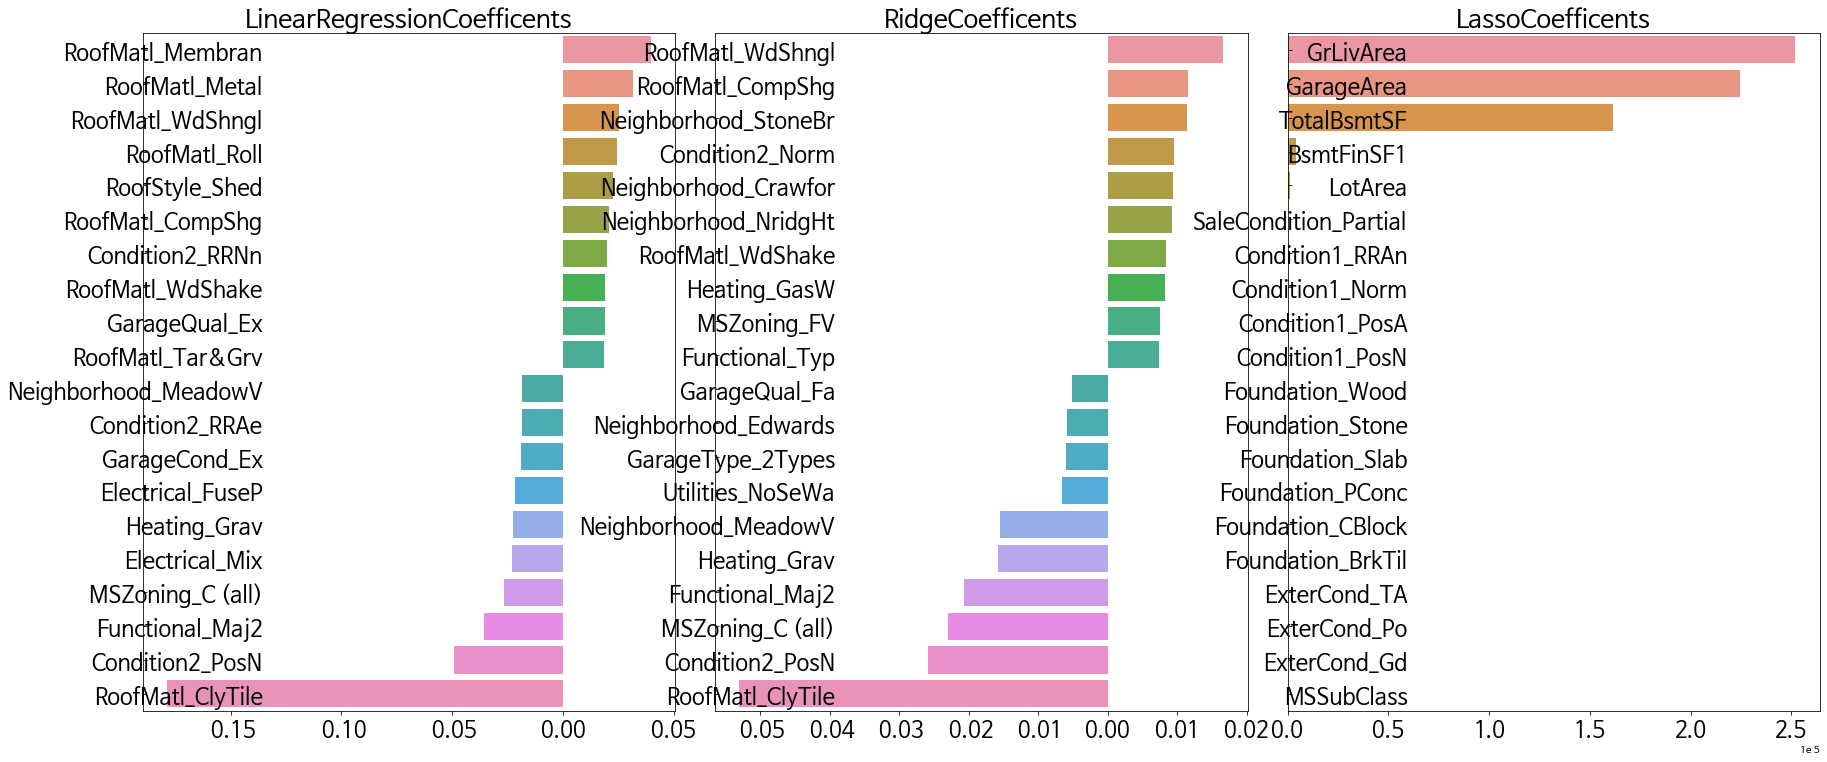

In [21]:
def visualize_coefficients(models):
  """
  회귀모델의 피처의 회귀계수에 대한 시각화
  """
  fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
  fig.tight_layout()

  for idx, model in enumerate(models):
    coef_high, coef_low = get_top_bottom_coef(model,X_features)

    # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
    coef_concat = pd.concat([coef_high, coef_low])

    # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
    axs[idx].set_title(model.__class__.__name__+ 'Coefficents', size = 25)
    axs[idx].tick_params(axis='y', direction='in', pad=-120)

    for label in (axs[idx].get_xticklabels() + axs[idx].get_yticklabels()):
      label.set_fontsize(22)
    sns.barplot(x = coef_concat.values, y = coef_concat.index, ax = axs[idx])

# 수행
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화. 
visualize_coefficients(models)

* alpah값 최적화 테스트 데이터세트의 예측 성능이 좋아짐.
* 모델별 회귀계수도 많이 달라짐.
* 라쏘는 LinearRegression, Ridge와는 다름

#### 5 폴드 교차검증으로 모델별로 RMSE와 평균 RMSE출력 
* 테스트 데이터세트와 학습 데이터세트와 분할하는데 있어 이슈파악키 위해.

In [22]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
  """
  분할하지않고 전체 데이터로 cross_val_score()수행,모델별 CV RMSE값과 평균 RMSE출력
  """
  for model in models:    
    rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=True))
    rmse_avg = np.mean(rmse_list)

    print("\n {0} CV RMSE 값 리스트 : {1}".format(model.__class__.__name__, np.round(rmse_list, 3)))
    print("\n {0} CV 평균 RMSE값 : {1}".format(model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 모델을 인자로 제공
get_avg_rmse_cv(models)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



 LinearRegression CV RMSE 값 리스트 : [0.011 0.013 0.013 0.009 0.015]

 LinearRegression CV 평균 RMSE값 : 0.012

 Ridge CV RMSE 값 리스트 : [0.009 0.012 0.011 0.009 0.014]

 Ridge CV 평균 RMSE값 : 0.011

 Lasso CV RMSE 값 리스트 : [0.016 0.019 0.018 0.017 0.022]

 Lasso CV 평균 RMSE값 : 0.019


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


#### 하이퍼 파라미터 튜팅
* 각 모델들의 alpha값을 변경하면서 하이퍼 파라미터 튜닝 후 다시 재 학습/예측/평가 

In [23]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
  """
  모델및 알파 파라미터를 인자로 받아 하이퍼 파라미터 튜닝 후 가장 좋은 성능을 
  갖는 모델을 리턴
  """
  grid_model = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
  grid_model.fit(X_features, y_target)
  rmse = np.sqrt(-1 * grid_model.best_score_)
  print("{0} 5 CV시 최적 평균 RMSE값 : {1}, 최적 alpha값 : {2}".format(model.__class__.__name__,
                                                              np.round(rmse, 4), grid_model.best_params_))
  return grid_model.best_estimator_

# 수행
ridge_reg = models[1]
lasso_reg = models[2]
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE값 : 0.011, 최적 alpha값 : {'alpha': 10}
Lasso 5 CV시 최적 평균 RMSE값 : 0.0126, 최적 alpha값 : {'alpha': 0.001}


LinearRegression 로그변환된 RMSE : 0.01
Ridge 로그변환된 RMSE : 0.01
Lasso 로그변환된 RMSE : 0.011


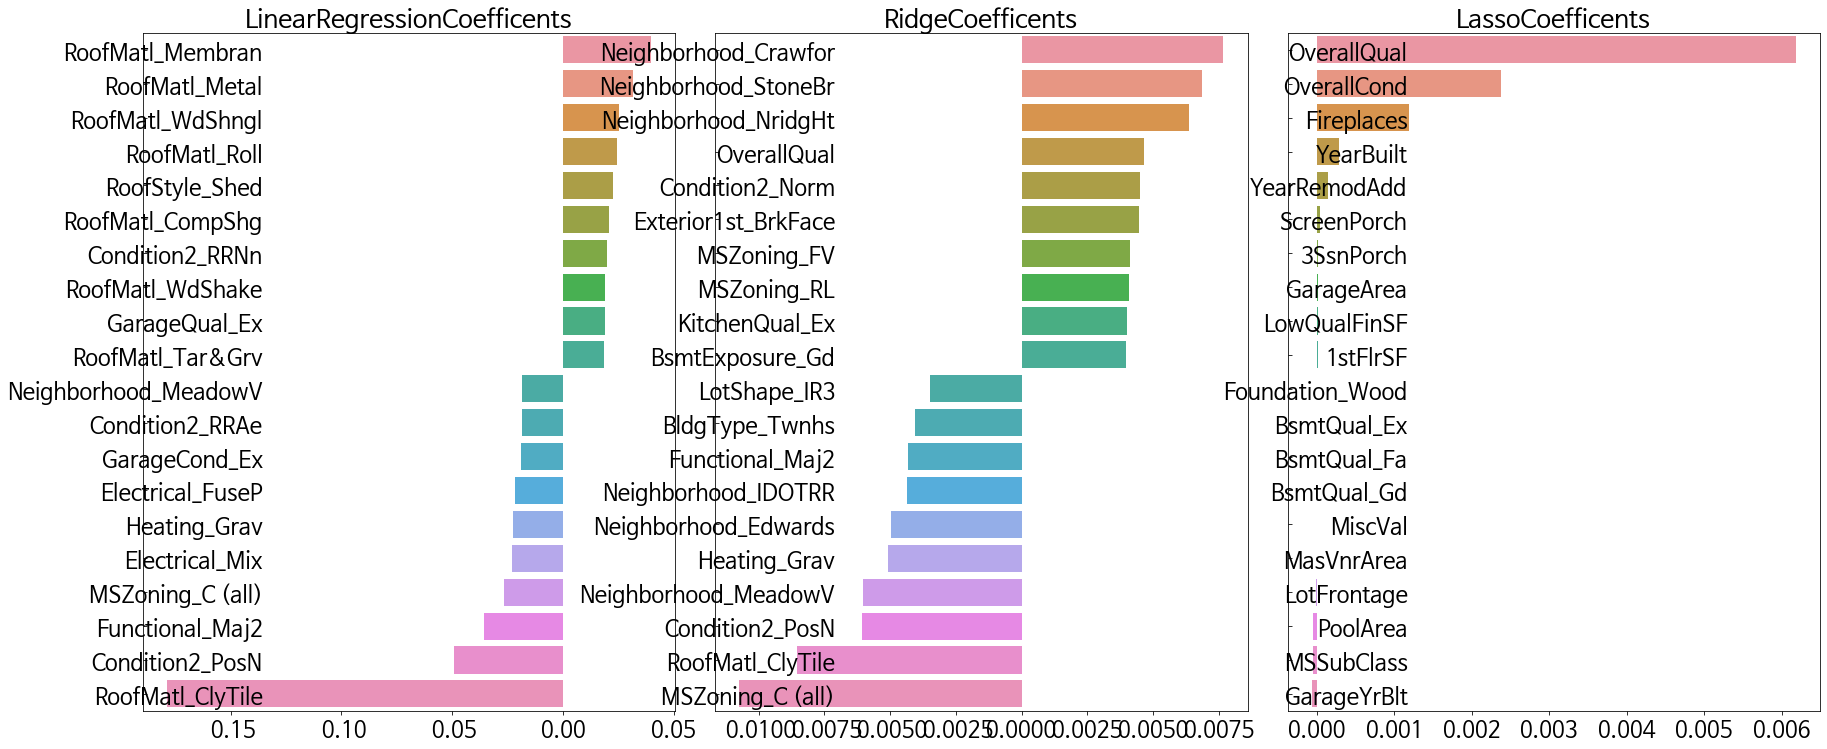

In [24]:
def refitModel():
  """
  하이퍼 파라미터 튜닝된 최적 파라미터로 재학습, 예측 및 평가 수행
  """
  lr_reg = LinearRegression()
  lr_reg.fit(X_train, y_train)

  ridge_reg = Ridge(alpha=10)
  ridge_reg.fit(X_train, y_train)

  lasso_reg = Lasso(alpha=0.001)
  lasso_reg.fit(X_train, y_train)

  # 모든 모델의 RMSE출력
  models = [lr_reg, ridge_reg, lasso_reg]
  get_rmses(models, X_test, y_test)

  # 모든 모델의 회귀계수 시각화
  visualize_coefficients(models)

# 함수 수행
refitModel()  

#### 숫자 피처들에 대한 데이터 분포
*  숫자 피처의 왜곡도 확인 후 높은 왜곡도를 가지는 피처 추출
* 왜곡도가 1인 피처들은 로그 변환 적용하고 다시 하이퍼 파라미터 튜닝 후 재학습 /예측/ 평가

In [25]:
from scipy.stats import skew

# 숫자형피처들의 인덱스객체 추출
# 원-핫인코딩 변환전 데이터프레임을 대상
feature_idx = house_df.dtypes[house_df.dtypes != 'object'].index

# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = house_df[feature_idx].apply(lambda x: skew(x))

# Series type이며, 1보다 크면 왜곡정도가 있다고 본다.
display(skew_features, type(skew_features))

# 해당 값이 1보다 크면 왜곡이 있는것으로 본다
skew_features_top = skew_features[skew_features > 1]

# 왜곡도가 높은 순으로 출력
display(skew_features_top.sort_values(ascending=False))

MSSubClass        1.406210
LotFrontage       2.406671
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.674865
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.677636
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
SalePrice        -0.009219
d

pandas.core.series.Series

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64

In [27]:
from scipy.stats import skew
def skew_top(df):
  """
  숫자형 피처중 왜곡된 분포에 대한 데이터 확인 및 추출
  """

  # 1.숫자형 피처의 인덱스 객체 추출
  feature_idx = df.dtypes[df.dtypes != object].index

  # 2.apply(lambda)를 이용해 해당 인덱스를 갖는 피처에 skew함수 적용
  skew_features = df[feature_idx].apply(lambda x : skew(x))

  # 3.왜곡정도가 1이상인것만 추출
  skew_features_top = skew_features[skew_features > 1]
  display("왜곡정도가 1이상것만 추출 : \n", skew_features_top.sort_values(ascending=False))
  return skew_features_top

# 수행
skew_features_top = skew_top(house_df)
display(type(skew_features_top))

'왜곡정도가 1이상것만 추출 : \n'

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64

pandas.core.series.Series

##### 왜곡도가 높은 피처 처리
* 왜곡도가 1인 피처들은 로그변환 후 원-핫인코딩 처리 피처/타겟 데이터 생성

In [28]:
# 왜곡도가 높은 피처 로그변환
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [29]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
dropCols = ['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu']
original_SalePrice, house_df_ohe = feature_engineering(house_df, dropCols, ohEncode=True)

## Null 피처의 Type : 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


'pd.get_dummies() 전 Shape '

(1460, 75)

'pd.get_dummies() 후 Shape'

(1460, 271)

## Null 피처의 Type : 
 Series([], dtype: object)


In [30]:
# 왜곡도가 높은 피처들에 대해 로그변환후에 RMSE값 확인
models, X_features, y_target,X_train, y_train, X_test, y_test = fitModel(house_df_ohe)

(1168, 270)

(292, 270)

(1168,)

(292,)

LinearRegression 로그변환된 RMSE : 0.003
Ridge 로그변환된 RMSE : 0.003
Lasso 로그변환된 RMSE : 0.008


In [31]:
# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_reg = models[1]
lasso_reg = models[2]
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE값 : 0.0028, 최적 alpha값 : {'alpha': 10}
Lasso 5 CV시 최적 평균 RMSE값 : 0.004, 최적 alpha값 : {'alpha': 0.001}


LinearRegression 로그변환된 RMSE : 0.003
Ridge 로그변환된 RMSE : 0.003
Lasso 로그변환된 RMSE : 0.004


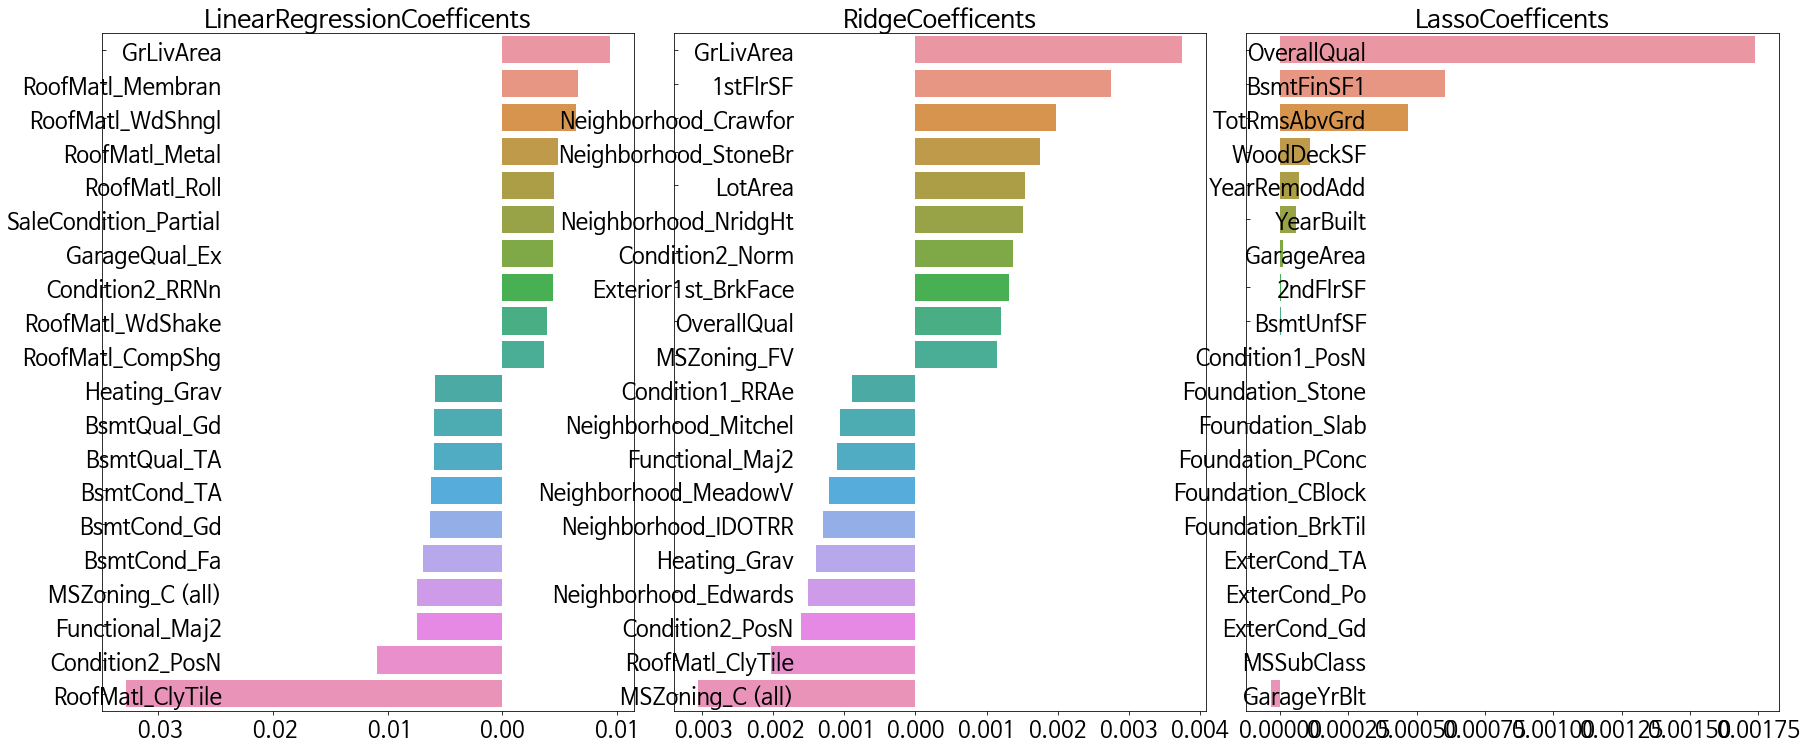

In [32]:
# 앞의 최적화 alpha값으로 학습데이터 학습, 테스트 데이터로 예측 및 평가 수행
# 모든 모델의 RMSE출력
# 모든 모델의 회귀 계수 시각화
refitModel()

** 이상치 데이터 검출을 위해 주요 피처인 GrLivArea값에 대한 산포도 확인 **

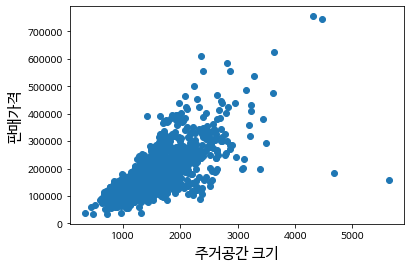

In [33]:
def plot_saleprice_vs_grLiveArea(df):
  """
  GrLiveArea에 대한 SalePrice의 분포도 확인
  """
  plt.scatter(x=df['GrLivArea'], y = df['SalePrice'])
  plt.xlabel("주거공간 크기", fontsize=15)
  plt.ylabel("판매가격", fontsize=15)
  plt.show()

# 수행
plot_saleprice_vs_grLiveArea(house_df_org)

##### 이상치 데이터 삭제 후 재학습/예측/평가

In [34]:
def removal_outlier(df):
  """
  이상치 데이터 삭제 후 리턴 
  """
  # GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성.
  cond1 = df['GrLivArea'] > np.log1p(4000)
  cond2 = df['SalePrice'] < np.log1p(500000)
  outlier_idx = df[cond1 & cond2].index

  print("Outlier Index Values : ", outlier_idx.values)
  print("Outliner Index 값 빈도 : ", outlier_idx.value_counts)
  print("Outlier 삭제전 데이터 프레임 Shape : ", df.shape)

  # outlier레코드 삭제
  df.drop(index = outlier_idx, inplace=True, errors = 'ignore')
  print("Outlier 삭제후 데이터 프레임 Shape : ", df.shape)
  return df

In [50]:
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_idx = house_df_ohe[cond1 & cond2].index

print("Outlier Index 값 : ", outlier_idx.values)
print("Outlier Index 값 빈도 : ", outlier_idx.value_counts)
print("OutLine삭제 전 데이터프레임 Shape : ", house_df_ohe.shape)

# Outlier레코드 삭제
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(index = outlier_idx, inplace=True, axis=0, errors='ignore')
print("OutLine삭제 후 데이터프레임 Shape : ", house_df_ohe.shape)

Outlier Index 값 :  [ 523  691 1182 1298]
Outlier Index 값 빈도 :  <bound method IndexOpsMixin.value_counts of Int64Index([523, 691, 1182, 1298], dtype='int64')>
OutLine삭제 전 데이터프레임 Shape :  (1460, 271)
OutLine삭제 후 데이터프레임 Shape :  (1456, 271)


In [35]:
removal_outlier(house_df_ohe)

Outlier Index Values :  [ 523  691 1182 1298]
Outliner Index 값 빈도 :  <bound method IndexOpsMixin.value_counts of Int64Index([523, 691, 1182, 1298], dtype='int64')>
Outlier 삭제전 데이터 프레임 Shape :  (1460, 271)
Outlier 삭제후 데이터 프레임 Shape :  (1456, 271)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,150,6.753438,6.753438,854,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,2003.0,2,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008,1.276430,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,284,7.141245,7.141245,0,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,1976.0,2,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007,1.273490,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,434,6.825460,6.825460,866,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,2001.0,2,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9,2008,1.277889,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,540,6.629363,6.869014,756,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,1998.0,3,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2,2006,1.267876,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,490,7.044033,7.044033,1053,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,2000.0,3,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12,2008,1.280221,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,953,6.860664,6.860664,694,0.0,7.407318,0,0.000000,2,1,3,0.693147,7,1,1999.0,2,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,8,2007,1.272710,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,589,7.341484,7.637234,0,0.0,7.637234,1,0.000000,2,0,3,0.693147,7,2,1978.0,2,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,2,2010,1.276581,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,877,7.050123,7.080868,1152,0.0,7.758333,0,0.000000,2,0,4,0.693147,9,2,1941.0,1,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,5,2010,1.281539,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,0,6.983790,6.983790,0,0.0,6.983790,1,0.000000,1,0,2,0.6931

In [50]:
# 이상시 삭제후 재학습,예측 및 평가
models, X_features, y_target,X_train, y_train, X_test, y_test = fitModel(house_df_ohe)

(1164, 270)

(292, 270)

(1164,)

(292,)

LinearRegression 로그변환된 RMSE : 0.003
Ridge 로그변환된 RMSE : 0.003
Lasso 로그변환된 RMSE : 0.009


In [37]:
# 수행
ridge_reg = models[1]
lasso_reg = models[2]
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE값 : 0.0025, 최적 alpha값 : {'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE값 : 0.0039, 최적 alpha값 : {'alpha': 0.001}


LinearRegression 로그변환된 RMSE : 0.003
Ridge 로그변환된 RMSE : 0.003
Lasso 로그변환된 RMSE : 0.004


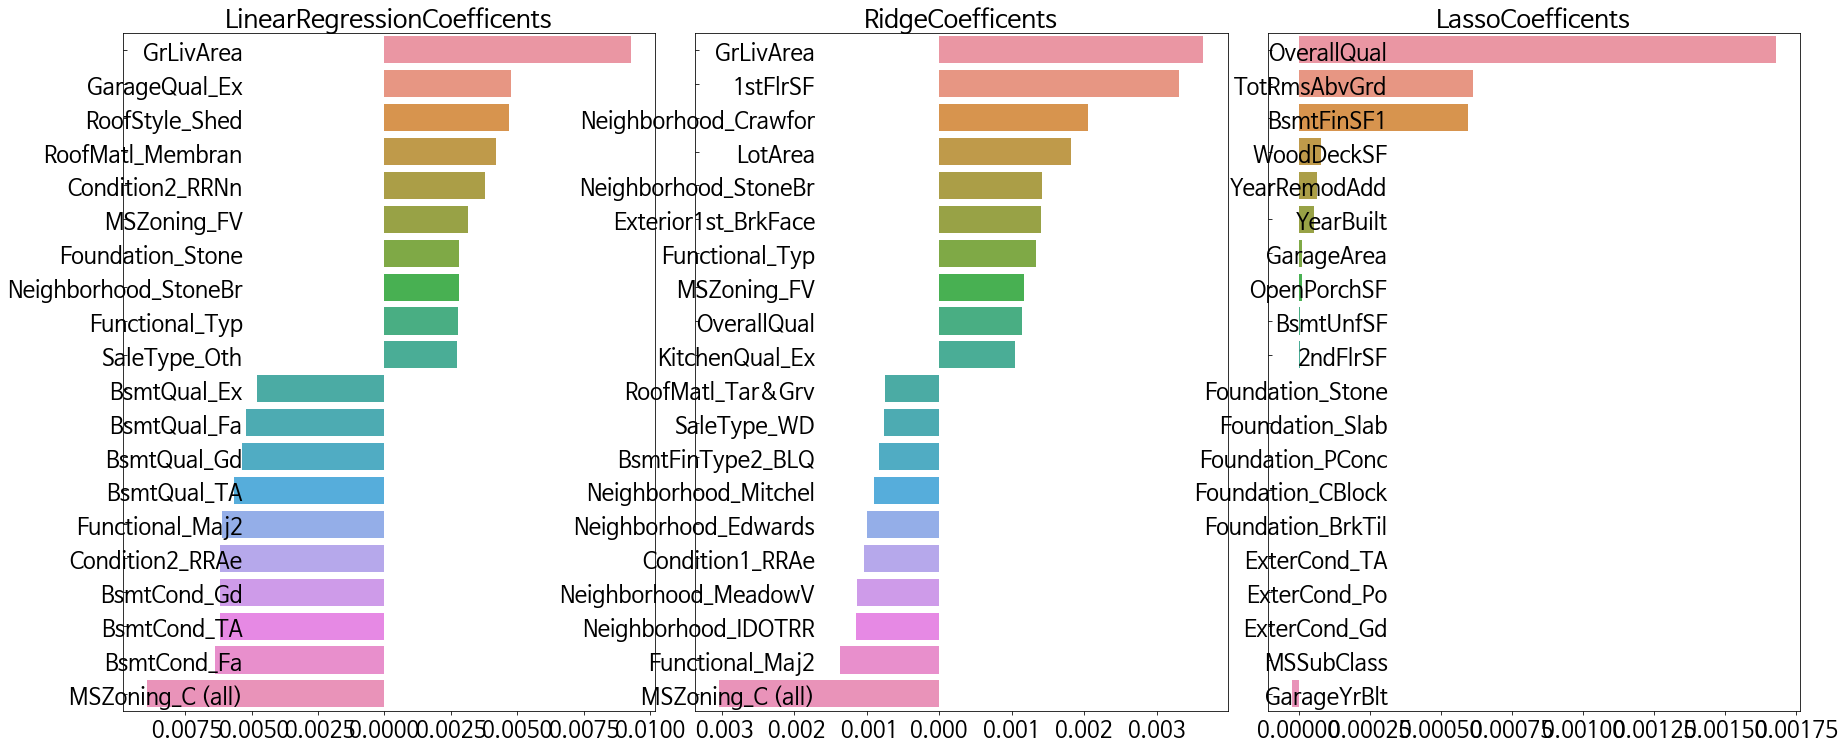

In [38]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
# 모든 모델의 RMSE출력
# 모든 모델의 회귀 계수 시각화
refitModel()

### 회귀 트리 학습/예측/평가 

* XGBoost와 LightGBM 학습/예측/평가

In [39]:
from xgboost import XGBRegressor

#다른 파라미터까지 하이퍼 튜닝하면 시간이 너무 많이 걸림
xgb_params = {'n_estimators': [1000]}

# colsample_bytree : 오버피팅을 줄이기 위함.컬럼을 50퍼센트만 샘플링
# subsample : 전체 레코드에서 샘플링하는 비율(0.8 - 80%)
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
best_xgb= get_best_params(xgb_reg, xgb_params)

[02:13:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV시 최적 평균 RMSE값 : 0.0025, 최적 alpha값 : {'n_estimators': 1000}


In [40]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators': [10000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = get_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV시 최적 평균 RMSE값 : 0.0027, 최적 alpha값 : {'n_estimators': 10000}


#### 트리 회귀 모델의 피처 중요도 시각화

In [41]:
ftr_importances_values = best_lgbm.feature_importances_
ftr_importance = pd.Series(ftr_importances_values, index=X_features.columns)
ftr_top20 = ftr_importance.sort_values(ascending=False)
display(ftr_top20, type(ftr_top20))

LotArea                1741
BsmtUnfSF              1565
GrLivArea              1558
1stFlrSF               1552
GarageArea             1477
                       ... 
Exterior1st_AsbShng       0
RoofMatl_WdShngl          0
RoofMatl_WdShake          0
RoofMatl_Tar&Grv          0
Exterior1st_CBlock        0
Length: 270, dtype: int64

pandas.core.series.Series

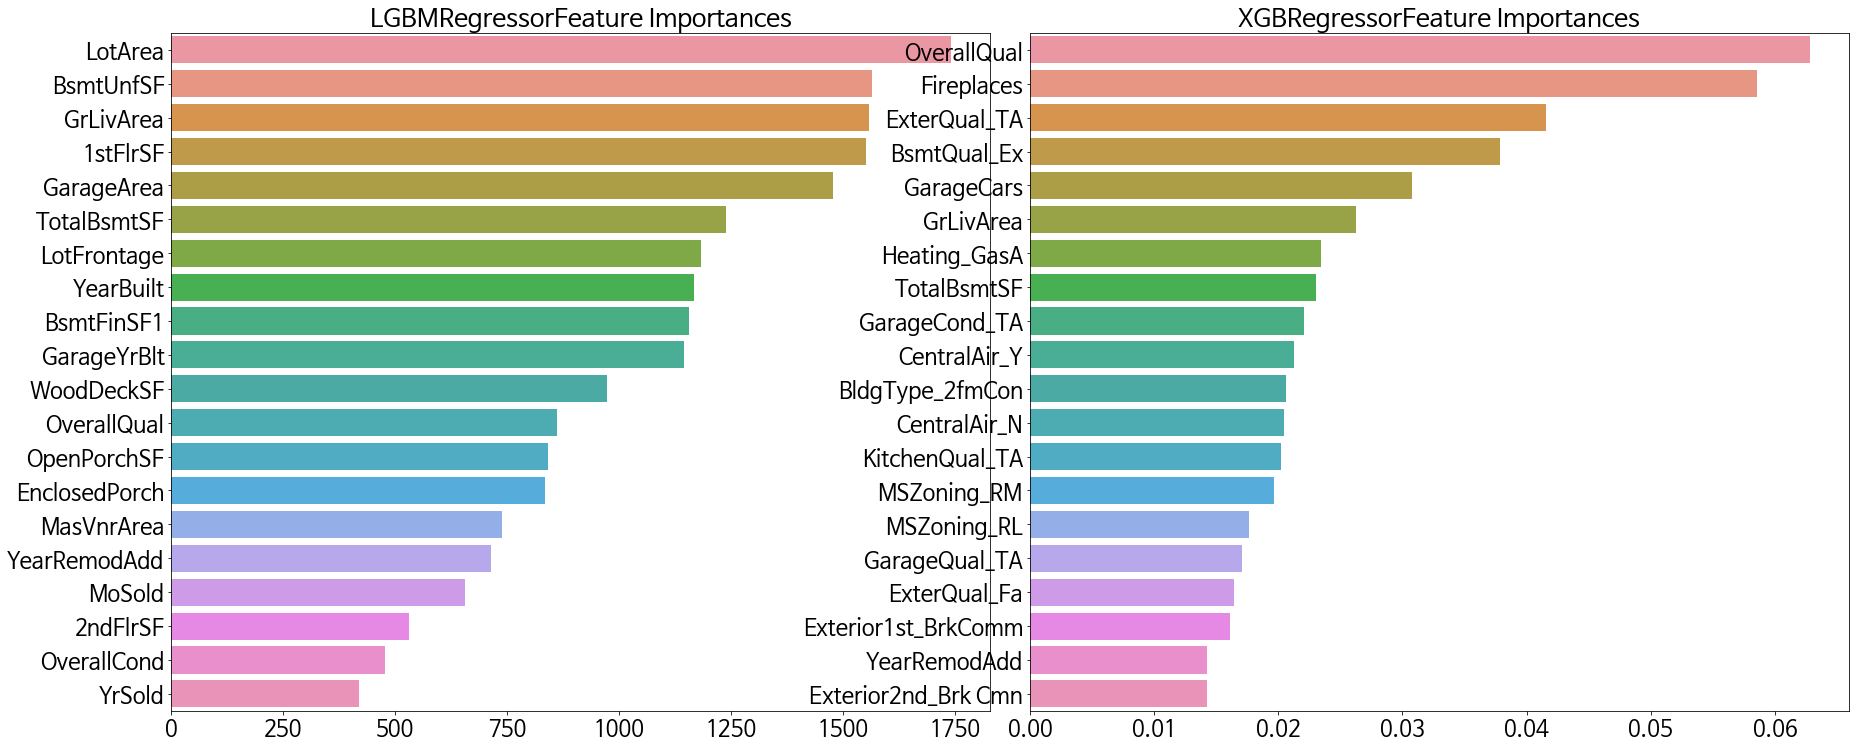

In [42]:
def get_top_features20(model):
  """
  모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
  """
  ftr_importances_values = model.feature_importances_
  ftr_importance = pd.Series(ftr_importances_values, index=X_features.columns)
  ftr_top20 = ftr_importance.sort_values(ascending=False)
  return ftr_top20

def visualize_ftr_importances(models):
  """
  2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
  """
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))
  fig.tight_layout()

  for idx, model in enumerate(models):
    # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
    ftr_top20 = get_top_features20(model)[:20]

    axs[idx].set_title(model.__class__.__name__+'Feature Importances', size=25)
    # font크기 조정
    for label in (axs[idx].get_xticklabels() + axs[idx].get_yticklabels()):
      label.set_fontsize(22)
    sns.barplot(x = ftr_top20, y= ftr_top20.index, ax= axs[idx])

# 회귀트리 피처 중요도 시각화
# 앞 예제에서 get_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_lgbm, best_xgb]
visualize_ftr_importances(models)    

#### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

In [43]:
def get_rmse_pred(preds):
  """
  각각 모델에 예측값을 딕셔너리 형태로 받아 
  모델에 대한 예측 성능 (RMSE)값 평가
  """
  for key in preds.keys():
      pred_value = preds[key]
      mse = mean_squared_error(y_test , pred_value)
      rmse = np.sqrt(mse)
      print('{0} 모델의 RMSE: {1}'.format(key, rmse))

In [44]:
# 개별 모델의 학습
ridge_reg = Ridge(alpha=0.8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
# 특정 모델의 예측값에 가중치 부여
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.0031441883924619683
Ridge 모델의 RMSE: 0.0028187590305493704
Lasso 모델의 RMSE: 0.003934115121816261


In [45]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, \
                       subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_job=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.6 * lgbm_pred
preds = {"최종혼합": pred, "XGBM": xgb_pred, "LGBM": lgbm_pred}

get_rmse_pred(preds)

[02:15:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종혼합 모델의 RMSE: 0.12743007914478216
XGBM 모델의 RMSE: 0.002650093452915334
LGBM 모델의 RMSE: 0.00265157957877428


* 결과

> 최종혼합 모델의 RMSE: 0.12743007914478216

> XGBM 모델의 RMSE: 0.002650093452915334

> LGBM 모델의 RMSE: 0.00265157957877428

#### 스태킹 모델을 통한 회귀 예측

In [46]:
from sklearn.model_selection import KFold
import numpy as np
help(KFold)

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  KFold(n_splits=5, shuffle=False, random_state=None)
 |  
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=5
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.22
 |          ``n_splits`` default value changed from 3 to 5.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instanc

In [47]:
X = np.array([[1, 2], [3, 4], [5, 6], [3, 4]])
y = np.array([1, 2, 3, 4])

kf = KFold(n_splits=2, shuffle=False, random_state=0)
kf.get_n_splits()  # 나눈 갯수

for train_idx, test_idx in kf.split(X, y):
  print("Train idx : {0}, Test Idx : {1}".format(train_idx, test_idx))

  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[test_idx], y[test_idx]

Train idx : [2 3], Test Idx : [0 1]
Train idx : [0 1], Test Idx : [2 3]


In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
  """
  개별 기반 모델에서 최종 메타 모델이 사용할 
  학습 및 테스트용 데이터를 생성하기 위한 함수
  """
  #지정된 n_folds값으로 KFold생성
  kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
  
  #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파일 배열 초기화
  train_fold_pred = np.zeros((X_train.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))

  print(model.__class__.__name__, "모델 시작")

  for folder_counter, (train_idx, valid_idx) in enumerate(kf.split(X_train_n)):
    #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
    print("\t 폴드 세트 : ", folder_counter, ' 시작 ')
    X_tr = X_train_n[train_idx]
    y_tr = y_train_n[train_idx]
    X_te = X_train_n[valid_idx]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
    model.fit(X_tr, y_tr)

    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
    train_fold_pred[valid_idx, :] = model.predict(X_te).reshape(-1, 1)
    #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
    test_pred[:, folder_counter] = model.predict(X_test_n)
            
  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
  #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred , test_pred_mean

** 기반 모델은 리지, 라소, XGBoost, LightGBM 으로 만들고 최종 메타 모델은 라소로 생성하여 학습/예측/평가 **

In [ ]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge 모델 시작
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
Lasso 모델 시작
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
XGBRegressor 모델 시작
	 폴드 세트 :  0  시작 
[02:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트 :  1  시작 
[02:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트 :  2  시작 
[02:33:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트 :  3  시작 
[02:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
def fit_predict_eval_metamodel():
  """
  개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking형태로 결합
  """
  Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis = 1)
  Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis = 1)

  # 최종 메타모델은 Lasso
  meta_model_lasso = Lasso(alpha=0.0005)

  #기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측 및 평가 수행
  meta_model_lasso.fit(Stack_final_X_train, y_train)
  final = meta_model_lasso.predict(Stack_final_X_test)
  mse = mean_squared_error(y_test, final)
  rmse = np.sqrt(mse)

  print("스태킹 회귀 모델의 최종 RMSE값은 : ", rmse)

# 최종 메타모델 수행
fit_predict_eval_metamodel()